# SVM
## Linearly separable data
Given a trainign vectors $x_1 ... x_n$ with $y_i=1$ if $x_i$ belongs to the first class, $y_i=-1$ otherwise. If the data are linearly separable, we can define a separating hyperplane $w^Tx + b = 0$. Since, it exists a infinite number of separating hyperplane, the idea is to find the one that maximise the margin.

The first step is to derive the distance between the two hyperplanes defined by $w^Tx + b = \pm 1$. We can define the distance by $tw$, and taking two points belonging to the two hyperplanes. So the following holds:

\begin{align*}
x_- + tw = x_+\\
w^Tx_- + b =-1\\
w^Tx_+ + b = +1
\end{align*}

So in multiplying by $w^T$:

\begin{align*}
& w^Tx_- + tw^Tw = w^Tx_+\\
\Leftrightarrow & tw^Tw = 1 - b - (-1 -b) =2\\
\Leftrightarrow & t = \frac{2}{\lVert w \rVert}
\end{align*}

Maximise $t$ is equivalent to minimise $\lVert w \rVert$, so the minimisation problem is:

\begin{align*}
&\min_{w,b} \frac{1}{2}w^Tw\\
&\text{subject to } y_i(w^Tx_i+ b) \ge 1
\end{align*}

The constraint correspond to:

\begin{align*}
(w^Tx_i+ b) \ge 1 \text{ if } y_i= +1 \\
(w^Tx_i+ b) \le -1 \text{ if } y_i = -1 
\end{align*}

The Lagrangian can be formulated this way:

\begin{align*}
L(w, b, \lambda_i) = \frac{1}{2}w^Tw  - \sum_{i=1}^{n} \lambda_i (y_i(w^Tx_i+ b)- 1)
\end{align*}

By derivation:

\begin{align*}
\frac{\partial L}{\partial w} &= w - \sum_{i=1}^{n} \lambda_i y_ix_i=0\\
\frac{\partial L}{\partial b} &= \sum_{i=1}^{n} \lambda_i y_i=0\\
\end{align*}

Pluggin back theses equation into the Lagrangian:
\begin{align*}
L(w, b, \lambda_i) = \sum_{i=1}^{n} \lambda_i -\frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n}\lambda_i \lambda_j y_i y_j x_i^T x_j
\end{align*}

This leads to the dual problem:

\begin{align*}
	\max_{\lambda} &1^T \lambda - \frac{1}{2}a^T K a \\
	\text{subject to: }& \lambda \ge 0\\
    \ &\lambda^T y = 0
\end{align*}

Where $K_{ij} =y_iy_jx_i^Tx_j$.

## Relax the constraints
When the data are note linearly separable, the above problem doest not have a solution. The idea is to introduce parameter to relax the constraints, allowing some points to be misclassified:

\begin{align*}
\min_{w,b} \frac{1}{2}w^Tw + C\sum_{i=1}^{n} \epsilon_i\\
\text{subject to } & y_i(w^Tx_i+ b) \ge 1 - \epsilon_i\\
& \epsilon_i \ge 0
\end{align*}

The dual problem is similar to above, except the greater bound on $\lambda$:

\begin{align*}
	\max_{\lambda} &1^T \lambda - \frac{1}{2}a^T K a \\
	\text{subject to: }& 0 \le \lambda \le C\\
    \ &\lambda^T y = 0
\end{align*}

Where $K_{ij} =y_iy_jx_i^Tx_j$.

# Minimum enclosing hyper-sphere
For a set of n data samples $x_1$...$x_n$, the minimum enclosing hyper-sphere of the above data samples can be found by the following constrained optimisation problem:

\begin{align*}
&\min_{R,a,\xi_i} R^2 + C \sum_{i=1}^{n} \xi_i\\
&\text{subject to } (x_i-a)^T(x_i-a) \le R^2 + \xi_i, \forall \xi_i \ge 0
\end{align*}

where $R$ is the radius of the hyper-sphere, $a$ is the center of the hyper-sphere and the variable $C$ gives the trade-of between simplicity (or volume of the sphere) and the number of errors.

The Lagrangian can be formulated this way:

\begin{align*}
L(R, a, \xi_i, \lambda_i, \mu_i) = R^2 + C\sum_{i=1}^{n}{\xi_i} + \sum_{i=1}^{n}{\lambda_i}\left((x_i - a)^T(x_i - a) - R^2 - \xi_i \right) - \sum_{i=1}^{n}{\mu_i \xi_i}
\end{align*}

By derivation:

\begin{align*}
\frac{\partial L}{\partial R} &= 2R - 2R\sum_{i=1}^{n}{\lambda_i} = 0\\
\frac{\partial L}{\partial \xi_i} &= C - \lambda_i - \mu_i = 0\\
\frac{\partial L}{\partial a} &=  - 2\sum_{i=1}^{n}{\lambda_i} (x_i -a) = 0\\
\end{align*}

This means the following:

\begin{align*}
\sum_{i=1}^{n}{\lambda_i} &= 1\\
C - \lambda_i - \mu_i &= 0\\
a &=  \sum_{i=1}^{n}{\lambda_i} x_i\\
\end{align*}

Using first and second equation in the Lagrangian leads to:

\begin{align*}
L(R, a, \xi_i, \lambda_i, \mu_i) &= R^2\left(1-\sum_{i=1}^{n}{\lambda_i}\right) + \sum_{i=1}^{n}{\xi_i}(C-\lambda_i-\mu_i) + \sum_{i=1}^{n}{\lambda_i}(x_i - a)^T(x_i - a)\\
&=\sum_{i=1}^{n}{\lambda_i}(x_i - a)^T(x_i - a)
\end{align*}

In expanding this expression, and using the third equation above:

\begin{align*}
L(R, a, \xi_i, \lambda_i, \mu_i) &= \sum_{i=1}^{n}{\lambda_i}(x_i - a)^T(x_i - a)\\
&= \sum_{i=1}^{n}{\lambda_i}(x_i^T - a^T)(x_i - a)\\
&= \sum_{i=1}^{n}{\lambda_i}x_i^Tx_i  - 2\sum_{i=1}^{n}{\lambda_i}a^Tx_i  + \sum_{i=1}^{n}{\lambda_i}a^Ta\\
&= \sum_{i=1}^{n}{\lambda_i}x_i^Tx_i  - 2\sum_{j=1}^{n}{\lambda_j}x_j\sum_{i=1}^{n}{\lambda_i}x_i  + 1 \times a^Ta\\
&= \sum_{i=1}^{n}{\lambda_i}\|x_i\|^2  - 2\left\|\sum_{i=1}^{n}{\lambda_i}x_i\right\|^2  +\left\|\sum_{i=1}^{n}{\lambda_i}x_i\right\|^2\\
&= \sum_{i=1}^{n}{\lambda_i}\|x_i\|^2  - \left\|\sum_{i=1}^{n}{\lambda_i}x_i\right\|^2
\end{align*}

The problem is now:

\begin{align*}
\max_{\lambda_i} &\sum_{i=1}^{n}{\lambda_i}\|x_i\|^2  - \left\|\sum_{i=1}^{n}{\lambda_i}x_i\right\|^2\\
\text{subject to: }& \lambda_i = C-\mu_i\\
&\lambda_i \ge 0\\
&\sum_{i=1}^{n} \lambda_i = 1
\end{align*}

It can be put in a vectorise form:

\begin{align*}
	\max_{\lambda} &\text{ diag}(X^TX)^T\lambda - \lambda^TXX^T\lambda\\
	\text{subject to: }& 0\le \lambda \le C\\
    \ &|\lambda| = 1
\end{align*}

## Kernel
The general form, with a kernel $k(x_i, x_j)=\phi(x_i)^T\phi(x_j)$ is:

\begin{align*}
L(R, a, \xi_i, \lambda_i, \mu_u) &= \sum_{i=1}^{n}{\lambda_i}\|\phi(x_i)\|^2  - \left\|\sum_{i=1}^{n}{\lambda_i}\phi(x_i)\right\|^2
\end{align*}

The corresponding vectorise form is:

\begin{align*}
	\max_{\lambda} &\text{ diag}(\phi(X)^T\phi(X))^T\lambda - \lambda^T\phi(X)\phi(X)^T\lambda\\
	\text{subject to: }& 0\le \lambda \le C\\
    \ &|\lambda| = 1
\end{align*}

## Quadratic programming
The lambda can be obtained by solving the quadratic program.
The centre can be computed easily in using the expression:

\begin{align*}
	a = \sum_{i=1}^{n}{\lambda_ix_i}
\end{align*}

To compute the radius, the idea is to use the KKT conditions on the inequality constrains:

\begin{align*}
	\mu_i \xi_i &=0\\
	\lambda_i\left((x_i - a)^T(x_i -a) - R^2 - \xi_i \right)&=0
\end{align*}

To find the support vectors, $\lambda_i$ has to respect this strict inequalities $0<\lambda_i<C$. This means:

\begin{align*}
	\mu_i &\not =0\\
	\lambda_i &\not = 0
\end{align*}

So:

\begin{align*}
	\xi_i &=0\\
	(x_i - a)^T(x_i -a) - R^2 &=0
\end{align*}

This means the radius is the distance between this support vector and the centre. Practically speaking, it may exist several of them, so the mean is taken in practice.


As expected, a large value of $C$ penalises the value of $\xi_i$ which are representative of the distance in between the circle and points outside of it.
Choosing $C=0.1$ is more permissive and allow some points not to be in the circle.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
r1 = np.sqrt(np.random.random(100))
t1 = 2*np.pi*np.random.random(100)
data_1 = np.array([r1*np.cos(t1), r1*np.sin(t1)]).T

r2 = np.sqrt(3*np.random.random(100)+1)
t2 = 2*np.pi*np.random.random(100)
data_2 = np.array([r2*np.cos(t2), r2*np.sin(t2)]).T

In [3]:
vector_ran = np.random.rand(100)
data_1[vector_ran>0.95] = 1.5*data_1[vector_ran>0.95]
data_2[vector_ran>0.95] = 1.5*data_2[vector_ran>0.95]

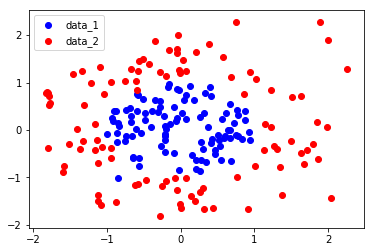

In [4]:
plt.scatter(data_1[:,0], data_1[:,1], color='b', label='data_1')
plt.scatter(data_2[:,0], data_2[:,1], color='r', label='data_2')
plt.legend()

In [5]:
def border(data, C):
    n = data.shape[0]
    
    P = 2*np.dot(data, data.T)
    q = -np.transpose(np.diag(np.dot(data, data.T))).reshape(n,)

    ub = C*np.ones((n,1))
    lb = np.zeros((n,1))
    G = np.vstack([np.eye(n), -np.eye(n)])
    h = np.vstack([ub, -lb]).reshape(2*n,)

    A = np.ones((1,n))
    b = np.array([1.])
    
    cvxopt.solvers.options['show_progress'] = False
    sol = cvxopt.solvers.qp(cvxopt.matrix(P), cvxopt.matrix(q), cvxopt.matrix(G), cvxopt.matrix(h), cvxopt.matrix(A), cvxopt.matrix(b))
    lamb = np.array(sol['x'])
    
    a = np.dot(data.T, lamb).T
    
    svm = np.array([data[i,:] for i in range(n) if lamb[i]>10e-6])
    
    R = np.mean(np.sqrt(np.diag(np.dot(svm-a, (svm-a).T))))
    
    return a, R

In [6]:
def plot_circle(C):
    a1, R1 = border(data_1, C)
    a2, R2 = border(data_2, C)
    
    plt.figure(figsize=(10,10))

    plt.scatter(data_1[:,0], data_1[:,1], color='b', label='data_1')
    plt.scatter(data_2[:,0], data_2[:,1], color='r', label='data_2')
    plt.scatter(a1[0,0], a1[0,1], marker='x', color='b')
    plt.scatter(a2[0,0], a2[0,1], marker='x', color='r')

    circle1=plt.Circle((a1[0,0],a1[0,1]),R1,color='b', fill=False)
    circle2=plt.Circle((a2[0,0],a2[0,1]),R2,color='r', fill=False)
    plt.gcf().gca().add_artist(circle1)
    plt.gcf().gca().add_artist(circle2)

    plt.legend()

In [7]:
C_factor=widgets.FloatLogSlider(value=0.1, base=10, min=-2, max=0, step=0.1, description='C')

ui = C_factor
out = widgets.interactive_output(plot_circle, {'C': C_factor})

display(ui, out)

FloatLogSlider(value=0.1, description='C', max=0.0, min=-2.0)

Output()